# Worksheet 14

Name: Yuhan Peng<br>
UID: U25596256

### Topics

- Naive Bayes
- Model Evaluation

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
|-------------|-------------|-------------|-------|
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No)
- P(Attribute B = Divorced | Class = Yes)
- P(Attribute C = High | Class = No)
- P(Attribute C = Mid | Class = Yes)

- P(Attribute A = Yes | Class = No) = 3/7<br>
- P(Attribute B = Divorced | Class = Yes) = 1/3<br>
- P(Attribute C = High | Class = No) = 3/7<br>
- P(Attribute C = Mid | Class = Yes) = 3/3

b) Classify the following unseen records:

- (Yes, Married, Mid)
- (No, Divorced, High)
- (No, Single, High)
- (No, Divorced, Low)

- (Yes, Married, Mid)<br>
P(yes | C = yes)P(Married | C = yes)P(Mid | C = yes)P(yes) = 0<br>
P(yes | C = no)P(Married | C = no)P(Mid | C = no)P(no) = 3/7 * 4/7 * 1/7 * 7/10 = 12/490<br>
<br>
Since P(yes, Married, Mid, yes) < P(yes, Married, Mid, no), the class should be No.<br>
<br>
- (No, Divorced, High)<br>
P(no | C = yes)P(Divorced | C = yes)P(High | C = yes)P(yes) = 3/3 * 1/3 * 0 = 0<br>
P(no | C = no)P(Divorced | C = no)P(High | C = no)P(no) = 4/7 * 1/7 * 3/7 * 7/10 = 12/490<br>
<br>
Since P(no, Divorced, High, yes) < P(no, Divorced, High, no), the class should be No.<br>
<br>
- (No, Single, High)<br>
P(no | C = yes)P(Single | C = yes)P(High | C = yes)P(yes) = 3/3 * 2/3 * 0 = 0<br>
P(no | C = no)P(Single | C = no)P(High | C = no)P(no) = 4/7 * 2/7 * 3/7 * 7/10 = 24/490<br>
<br>
Since P(no, Single, High, yes) < P(no, Single, High, no), the class should be No.<br>
<br>
- (No, Divorced, Low)<br>
P(no | C = yes)P(Divorced | C = yes)P(Low | C = yes)P(yes) = 3/3 * 1/3 * 0 = 0<br>
P(no | C = no)P(Divorced | C = no)P(Low | C = no)P(no) = 4/7 * 1/7 * 3/7 * 7/10 = 12/490<br>
<br>
Since P(no, Divorced, Low, yes) < P(no, Divorced, Low, no), the class should be No.

### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes

In [17]:
actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

def confusion_matrix(actual, predicted):
    # initialize counts for each combination of actual and predicted
    TP = 0  # True Positive
    FN = 0  # False Negative
    FP = 0  # False Positive
    TN = 0  # True Negative
    
    for a, p in zip(actual, predicted):
        if a == "Yes" and p == "Yes":
            TP += 1
        elif a == "Yes" and p == "No":
            FN += 1
        elif a == "No" and p == "Yes":
            FP += 1
        elif a == "No" and p == "No":
            TN += 1
            
    # create matrix using counts
    matrix = [[TP, FN], [FP, TN]]
    return matrix

print(confusion_matrix(actual_class, predicted_class))

[[2, 1], [3, 4]]


b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
|------------|---------------|---------------|
| actual = Y |       -1      |       5       |
| actual = N |        10     |       0       |

What is the cost of the above classification?

Cost = 5 * 1 + 10 * 3 + (-1) * 2 + 0 * 4 = 33

c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.

In [18]:
def compute_cost(actual, predicted, cost_matrix):
    # Generate confusion matrix first
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    
    for a, p in zip(actual, predicted):
        if a == "Yes" and p == "Yes":
            TP += 1
        elif a == "Yes" and p == "No":
            FN += 1
        elif a == "No" and p == "Yes":
            FP += 1
        elif a == "No" and p == "No":
            TN += 1
            
    # Using the confusion matrix and cost matrix, compute the cost
    cost = TP * cost_matrix[0][0] + FN * cost_matrix[0][1] + FP * cost_matrix[1][0] + TN * cost_matrix[1][1]
    
    return cost

cost_matrix = [[-1, 5], [10, 0]]

print("The cost is " + str(compute_cost(actual_class, predicted_class, cost_matrix)) + ".")

The cost is 33.


d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.

In [19]:
def accuracy(matrix):
    TP, FN, FP, TN = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
    return (TP + TN) / (TP + TN + FP + FN)

def precision(matrix):
    TP, FP = matrix[0][0], matrix[1][0]
    return TP / (TP + FP)

def recall(matrix):
    TP, FN = matrix[0][0], matrix[0][1]
    return TP / (TP + FN)

def f_measure(matrix):
    precision_value = precision(matrix)
    recall_value = recall(matrix)
    return 2 * (precision_value * recall_value) / (precision_value + recall_value)

print("Accuracy:", accuracy(confusion_matrix(actual_class, predicted_class)))
print("Precision:", precision(confusion_matrix(actual_class, predicted_class)))
print("Recall:", recall(confusion_matrix(actual_class, predicted_class)))
print("F-measure:", f_measure(confusion_matrix(actual_class, predicted_class)))

Accuracy: 0.6
Precision: 0.4
Recall: 0.6666666666666666
F-measure: 0.5


## Some useful code for the midterm

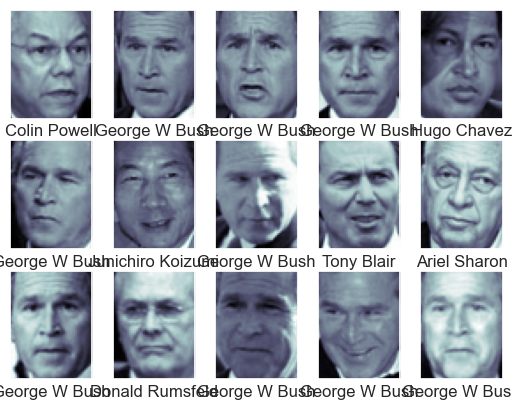

{'svc__C': 10, 'svc__gamma': 0.001}


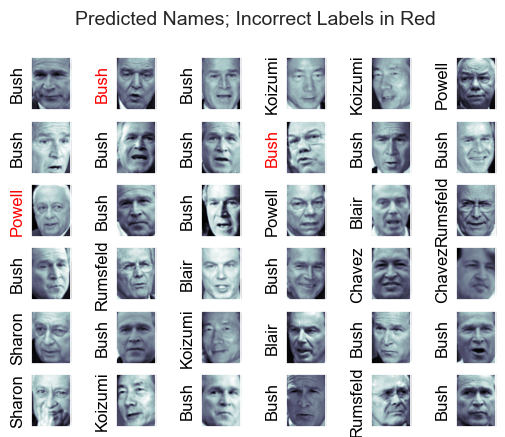

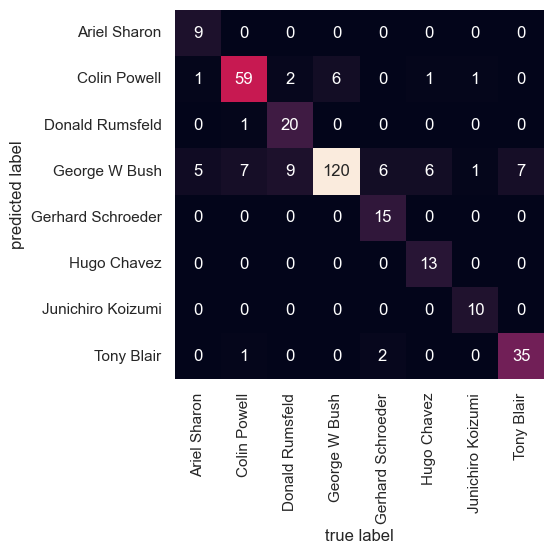

Accuracy =  0.8338278931750742


In [1]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
svcpca = make_pipeline(pca, svc)

# Tune model to find best values of C and gamma using cross validation
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
kfold = 10
grid = GridSearchCV(svcpca, param_grid, cv=kfold)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

# use the best params explicitly here
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
svcpca = make_pipeline(pca, svc)

model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))